# Lecture 8: API, Online Data Extraction/Scraping by Python
## Author: Nick Ves, UBDC Data Scientist

1.  What is an API?
   
    The words API stand for Application Programming Interface. Broadly speaking, is a collection of
    functions that  usually other programs use to interact with your program, in various ways.

    Users are normally shielded from the *implementation* particulars of the code are just exposed to what is important.

    In Python, some modules are making use of such API, to communicate with the system they run on.

    Example:
```python
import os
os.getlogin()  # Return the name of the user logged in on the controlling terminal of the process
'User'  # or YouUsername
```

   In the above example, we are intrested to get the namd of the logged user.

   To do so, we import the [os](https://docs.python.org/3/library/os.html#module-os) module,
   which in turn, calls some low-level functions to grab that name, and then make sure it returns it as a string
   for our usage.

    You were never told which functions are these, nor how they do it.
    You are only intrested to get a string that contains that information.

    That's how APIs work, they are a set of functions, that they do something,
    and usually they return the result of their operation.

1. What is Serialisation and De-Serialisation:

    Serialisation (or marshaling) is the translation process, of transforming data structures, to binary format.
    Remember when we store data into files, we actually store bytes of data.

    Serialised data, can be transferred through the wire

    The opposite operation, eg translating binary data to usuable data structures (like a python Dictionary Object)
    is called deserialisation.

    - You need to know, from before which methods were used to move from one state to another.
    - Python has the pickle module that can serialise data to bytes

    - The operations does not need to happen in the same system. Eg a server is transmiting serilised byte data,
    and a client can deserialise that into data structures.

    - Webservices that use the (REST) protocol the de-facto codec that these services chat with
    is the JSON represenation. For python, JSON representation strings can be de-serilised (translated) as a python dictionary

    ```python
import json
string = ""{
    "id" : 1,
    "data": {"name": "Nikos", "age": 35, "gender": "male", "height": 178}
}"""
data = json.loads(string)
print(data)
    ```
    
    
3. What is a REST WebService?
 REST (Representational state transfer) is a protocol, which defines methods that resources can be communicated between servers.
 A REST WebService, allows users through that server  of not only get textual representation of that resource,
 but also to modify or create as needed.

 It uses HTTP methods like GET, POST, OPTIONS and etc that upon their completion  generate responses
 that contain data serialised using a json coded.

In [1]:
import json
import pandas as pandas
import requests

## Serialisation/Deserialisation

In [ ]:
class A():
    def _init_(self):
        pass
    def print_name(self, name):
        print(name)

In [2]:
import json
import pickle
from pprint import pprint

# THIS IS NOT A JSON, THIS IS A PYTHON DICTIONARY OBJECT. 
# IT LOOKS LIKE A JSON BECAUSE IT WAS DESIGNED TO LOOK LIKE ONE.
data = { "id" : 1, "data": {"name": "Nikos", "age": 35, "gender": "male", "height": 178}}

# Serialise
# using the pickle protocol
d = pickle.dumps(data)# dump strings

print('Serialising! (datastructure to bytes)')
pprint(d)
pprint(type(d))

print('De-serialised! (bytes to datastructure)')
obj = pickle.loads(d) #decode binary data
pprint(obj)
pprint(type(obj))


# using the json protocol
d = json.dumps(data)
print('Serialised!  (datastructure to bytes)')
pprint(d)
pprint(type(d))

print('De-serialised!  (datastructure to bytes)')
obj = json.loads(d)
pprint(obj)
pprint(type(obj))



Serialising! (datastructure to bytes)
(b'\x80\x04\x95I\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x02id\x94K\x01\x8c\x04d'
 b'ata\x94}\x94(\x8c\x04name\x94\x8c\x05Nikos\x94\x8c\x03age\x94K#\x8c\x06gend'
 b'er\x94\x8c\x04male\x94\x8c\x06height\x94K\xb2uu.')
<class 'bytes'>
De-serialised! (bytes to datastructure)
{'data': {'age': 35, 'gender': 'male', 'height': 178, 'name': 'Nikos'}, 'id': 1}
<class 'dict'>
Serialised!  (datastructure to bytes)
('{"id": 1, "data": {"name": "Nikos", "age": 35, "gender": "male", "height": '
 '178}}')
<class 'str'>
De-serialised!  (datastructure to bytes)
{'data': {'age': 35, 'gender': 'male', 'height': 178, 'name': 'Nikos'}, 'id': 1}
<class 'dict'>


##### Different methods to `print`

In [3]:
payload = { "id" : 1, "data": {"name": "Nikos", "age": 35, "gender": "male", "height": 178}}
data = payload['data']
pprint(data)
print(type(data))
for key,value in data.items():
    # some different ways you can interpolate values inside a string
    print('this is the key: %s' % value)
    print('\tvalue: {0}'.format(value))
    print('\tthis is the key: {value}'.format(value=value))

    # using f-strings the convenient by far. (from python 3.6 and onwards?)
    print(f'\tthis is the key: {value}')

    # I use the *f expresions* to interpolate the variables in the string Templates.
    print(f"\tKey: {key.upper()} has value: {value}")


{'age': 35, 'gender': 'male', 'height': 178, 'name': 'Nikos'}
<class 'dict'>
this is the key: Nikos
	value: Nikos
	this is the key: Nikos
	this is the key: Nikos
	Key: NAME has value: Nikos
this is the key: 35
	value: 35
	this is the key: 35
	this is the key: 35
	Key: AGE has value: 35
this is the key: male
	value: male
	this is the key: male
	this is the key: male
	Key: GENDER has value: male
this is the key: 178
	value: 178
	this is the key: 178
	this is the key: 178
	Key: HEIGHT has value: 178


## The Request Package

To communicate with a remote server, _theoretically_ you don't need anything as Python comes with a complete set of modules that can do that.
You could do it. But you will never do it, as it's too complex, as it's designed to provide
the framework and  support for other libraries/tools to build upon

Instead you will be using a popular python package
called '[Requests](https://requests.readthedocs.io/en/master/)'  which has managed to become a standard tool.

> Requests
> A 'higher' level python package that helps to send HTTP/1.1 requests.
It's build around pythons build-in 'lower' level web libraries.

```bash
# To install it:
$ pip install requests
```

And it's usage it's pretty  more straightforward:

```python
# Fetching Chuck Norris Jokes from the Internet Chuck Noris Database.
# http://www.icndb.com/api/

import requests
# Create a Response object from that URL
r = requests.get('http://api.icndb.com/jokes/random?limitTo=[nerdy]')

# the Response Object contains the ..response of the server. It's accesible from the .raw

# Parse the data to a dictionary with the .json() function available
data = r.json()
print('{joke}'.format(joke=data['value']['joke']))
# Chuck Norris types with one finger. He points it at the keyboard and the keyboard does the rest.

```

In [5]:
import requests
# Create a Request object from that URL
response = requests.get('http://api.icndb.com/jokes/random?limitTo=[nerdy]')
# Parse the data to a dictionary with the .json() function available
data = response.json()
print('\n{joke}\n'.format(joke=data['value']['joke']))
# Chuck Norris types with one finger. He points it at the keyboard and the keyboard does the rest.


The only pattern Chuck Norris knows is God Object.



In [6]:
response.status_code

200

In [7]:
# Serialised state. Not much we can do with the data like that
response.content

b'{ "type": "success", "value": { "id": 460, "joke": "The only pattern Chuck Norris knows is God Object.", "categories": ["nerdy"] } }'

In [8]:
# Let's desialose that the previous state. We will use a toString codec, which it will produce a regular string
response.text

'{ "type": "success", "value": { "id": 460, "joke": "The only pattern Chuck Norris knows is God Object.", "categories": ["nerdy"] } }'

In [9]:
# Data coming from endpoints, are 99 of the times are following a well know known schema. That means we can
# use the desialised string, to a json deserialer to generate a pyton dict
import json
d = json.loads(response.text)
pprint(d)

{'type': 'success',
 'value': {'categories': ['nerdy'],
           'id': 460,
           'joke': 'The only pattern Chuck Norris knows is God Object.'}}


In [10]:
#In Fact this two operations are so


response.json()

{'type': 'success',
 'value': {'id': 460,
  'joke': 'The only pattern Chuck Norris knows is God Object.',
  'categories': ['nerdy']}}

In [11]:
import pprint
pprint.pprint(response.json())

{'type': 'success',
 'value': {'categories': ['nerdy'],
           'id': 460,
           'joke': 'The only pattern Chuck Norris knows is God Object.'}}


In [11]:
# Example: 
# Get some information from an end point: 

import requests
import pprint #  pretty print

res = requests.get('http://api.icndb.com/jokes/random')

print(res.text)
print(type(res.text))
print()
d = res.json()  # parse the response to a dictionary. 
print(type(d))
pprint.pprint(d)

# if you want to access somethign inside a dictionary, you can traverse to using it's key:
value = d['value']
joke = value['joke']
print(joke)

{ "type": "success", "value": { "id": 321, "joke": "Chuck Norris is widely predicted to be first black president. If you're thinking to yourself, &quot;But Chuck Norris isn't black&quot;, then you are dead wrong. And stop being a racist.", "categories": [] } }
<class 'str'>

<class 'dict'>
{'type': 'success',
 'value': {'categories': [],
           'id': 321,
           'joke': 'Chuck Norris is widely predicted to be first black '
                   "president. If you're thinking to yourself, &quot;But Chuck "
                   "Norris isn't black&quot;, then you are dead wrong. And "
                   'stop being a racist.'}}
Chuck Norris is widely predicted to be first black president. If you're thinking to yourself, &quot;But Chuck Norris isn't black&quot;, then you are dead wrong. And stop being a racist.


A rest api is dynamic in nature.
 
That means that the server can identify parameters 
that the client (you, or your program) is sending to him as part of your request. 

The server then can act on these parameters.

Usually the provider, provide some kind of documentation, 
which they have catalogued the name of the parameters, their types and their meaning. 


In [13]:
# Parameter Example
# Documentation about this API: 
# http://www.icndb.com/api/

import requests
# that API also supports returning multiple jokes at once. 
# .../jokes/random/<number_of_jokes>

r = requests.get('http://api.icndb.com/jokes/random/6')
data = r.json()


for idx, joke_entry in enumerate(data['value']): 
    print('{idx}: {joke}'.format(idx=idx,joke=joke_entry['joke']))


0: A handicapped parking sign does not signify that this spot is for handicapped people. It is actually in fact a warning, that the spot belongs to Chuck Norris and that you will be handicapped if you park there.
1: Chuck Norris can read from an input stream.
2: Aliens DO indeed exist. They just know better than to visit a planet that Chuck Norris is on.
3: Chuck Norris brushes his teeth with a mixture of iron shavings, industrial paint remover, and wood-grain alcohol.
4: Chuck Norris never has to wax his skis because they're always slick with blood.
5: If you work in an office with Chuck Norris, don't ask him for his three-hole-punch.


In [14]:
data

{'type': 'success',
 'value': [{'id': 40,
   'joke': 'A handicapped parking sign does not signify that this spot is for handicapped people. It is actually in fact a warning, that the spot belongs to Chuck Norris and that you will be handicapped if you park there.',
   'categories': []},
  {'id': 557,
   'joke': 'Chuck Norris can read from an input stream.',
   'categories': ['nerdy']},
  {'id': 344,
   'joke': 'Aliens DO indeed exist. They just know better than to visit a planet that Chuck Norris is on.',
   'categories': []},
  {'id': 190,
   'joke': 'Chuck Norris brushes his teeth with a mixture of iron shavings, industrial paint remover, and wood-grain alcohol.',
   'categories': []},
  {'id': 307,
   'joke': "Chuck Norris never has to wax his skis because they're always slick with blood.",
   'categories': []},
  {'id': 318,
   'joke': "If you work in an office with Chuck Norris, don't ask him for his three-hole-punch.",
   'categories': []}]}

In [13]:
from pprint import pprint
pprint(data['value'])

[{'categories': [],
  'id': 296,
  'joke': "Chuck Norris uses 8'x10' sheets of plywood as toilet paper."},
 {'categories': [],
  'id': 368,
  'joke': 'Chuck Norris has to register every part of his body as a separate '
          'lethal weapon. His spleen is considered a concealed weapon in over '
          '50 states.'},
 {'categories': [],
  'id': 83,
  'joke': 'While urinating, Chuck Norris is easily capable of welding '
          'titanium.'},
 {'categories': [],
  'id': 324,
  'joke': 'Chuck Norris drinks napalm to quell his heartburn.'},
 {'categories': ['explicit'],
  'id': 5,
  'joke': 'Chuck Norris lost his virginity before his dad did.'},
 {'categories': [],
  'id': 524,
  'joke': 'Chuck Norris eats lightning and shits out thunder.'}]


In [14]:
# Also he also declares that we can limit the jokes to a certain category:
r = requests.get('http://api.icndb.com/jokes/random/4?limitTo=[nerdy]')
data = r.json()

# enumerate is a 'build-in' python function to help you, 
# instead of writing the (idx =1 ... idx = idx + 1) pattern
for idx, joke_entry in enumerate(data['value'],1): 
    print('{idx}: {joke}'.format(idx=idx,joke=joke_entry['joke']))


1: Chuck Norris types with one finger. He points it at the keyboard and the keyboard does the rest.
2: No one has ever spoken during review of Chuck Norris' code and lived to tell about it.
3: Chuck Norris is the ultimate mutex, all threads fear him.
4: The class object inherits from Chuck Norris


Obviously, there is a lot of repetition, so when that is happening it is always 
it is always a good idea not to repeat yourself, by generalising. 
In this case, we can construct a function does all the  steps:


In [17]:
import requests

def get_jokes(how_many=2, nerdy_only=True, verbose=False):
    """ Get a number of jokes from the Internet Chuck Norris Database. 
    Returns a list of Dictionaries. 
    Will raise an exception if if the server cannot complete our request """
    request_url = 'http://api.icndb.com/jokes/random/'
    if int(how_many)>0:
        request_url += str(how_many)
    if nerdy_only:
        request_url += '?limitTo=[nerdy]'
    if verbose:
        print(request_url)
    r = requests.get(request_url)
    r.raise_for_status() 
    
    return r.json()['value']

In [19]:
get_jokes(how_many=2, nerdy_only=True, verbose=True)

http://api.icndb.com/jokes/random/2?limitTo=[nerdy]
[{'id': 488, 'joke': "Chuck Norris doesn't pair program.", 'categories': ['nerdy']}, {'id': 471, 'joke': "Chuck Norris's keyboard doesn't have a Ctrl key because nothing controls Chuck Norris.", 'categories': ['nerdy']}]


In [17]:
# We must _always_ check the status code of the response. 
# The responose_code (status_code) tells you what had happened at it. 
# There are 5 general categories
# between 100 and 199 -> Infrormation codes
# between 200 and 299 -> Success codes (yay we want one of them)
# between 300 and 399 -> Redirection (watch out. requests follow redirects automatically. maybe not true for other packages)
# between 400 and 499 -> Fail (your problem)
# between 500 and 599 -> Fail (servers problem)
# https://developer.mozilla.org/en-US/docs/Web/HTTP/Status
# 

r.status_code


200

In [18]:
jokes = get_jokes(5,nerdy_only=False)
for idx, joke in enumerate(jokes,1):
    print(idx, joke['joke'], sep='. ')

1. The phrase 'break a leg' was originally coined by Chuck Norris's co-stars in Walker, Texas Ranger as a good luck charm, indicating that a broken leg might be the worst extent of their injuries. This never proved to be the case.
2. If Chuck Norris writes code with bugs, the bugs fix themselves.
3. All arrays Chuck Norris declares are of infinite size, because Chuck Norris knows no bounds.
4. Chuck Norris doesn't use Oracle, he is the Oracle.
5. Chuck Norris doesn't win, he allows you to lose.


## CCTV Data.


UBDC is using images from cctv cameras located around Glasgow to fuel a ML model trained to extract various object from them.  
That data cna be accessed through an our API endpoint, at  

`https://api.ubdc.ac.uk/labs/cctv/api/counts/`

Documentation of the endpoint can be found at 

`https://api.ubdc.ac.uk/labs/cctv/api/docs/`


In [20]:
username='2604299H'
password='HhCcYy1231$$'
endpoint='https://api.ubdc.ac.uk/labs/cctv/api/counts/'

In [22]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt # Make subsequent  any plots a little bigger
plt.rcParams["figure.dpi"] = 125

In [34]:
# Get the data

def get_dataframe_for_location(location,start_date,days=5):
    if days > 7:
        raise ValueError('Days must be less than 7')

    params = dict()
    date_format = '%m/%d/%Y'
    _start_date = datetime.strptime(start_date,date_format)
    params['locations'] = location
    params['start_date'] = _start_date.strftime(date_format)
    params['end_date'] = (_start_date + timedelta(days=days)).strftime(date_format)
    # print(params)

    dataFrame = None
    next_page = endpoint
    page_number = 0
    while next_page:
        page_number += 1
        response = requests.get(
            url=next_page,
            auth=(username, password),
            params=params
        )
        if not 200 <= response.status_code < 299:
            raise Exception('Return code was not in the 200 range.\n Did you forget to put your username/password?' )
        data = response.json()
        number_of_results = data['count']
        next_page = data['next']
        if number_of_results > 0:
            tmp_df = pd.DataFrame.from_records(data=data['results'],index='id')
            tmp_df['timestamp'] = pd.to_datetime(tmp_df.timestamp)
            tmp_df['totalCount'] = tmp_df.apply(lambda row: row.cars + row.buses + row.persons + row.trucks + row.bicycles + row.motorcycles,1)

            if dataFrame is None:
                dataFrame = tmp_df
            else:
                dataFrame = pd.concat([dataFrame,tmp_df])

    return dataFrame



df = get_dataframe_for_location("Argyle_St_@_Jamaica_St",start_date='6/6/2020',days=7)

In [38]:
df.head()

,timestamp,location,cars,persons,bicycles,trucks,motorcycles,buses,totalCount
id,,,,,,,,,
96601,2020-06-06 00:01:09.012000+00:00,Argyle_St_@_Jamaica_St,3,0,0,0,0,0,3
96613,2020-06-06 00:31:08.039000+00:00,Argyle_St_@_Jamaica_St,3,0,0,0,0,0,3
96629,2020-06-06 01:01:09.046000+00:00,Argyle_St_@_Jamaica_St,1,0,0,0,0,0,1
96654,2020-06-06 02:01:08.069000+00:00,Argyle_St_@_Jamaica_St,1,0,0,0,0,0,1
96669,2020-06-06 02:31:08.038000+00:00,Argyle_St_@_Jamaica_St,1,0,0,0,0,0,1


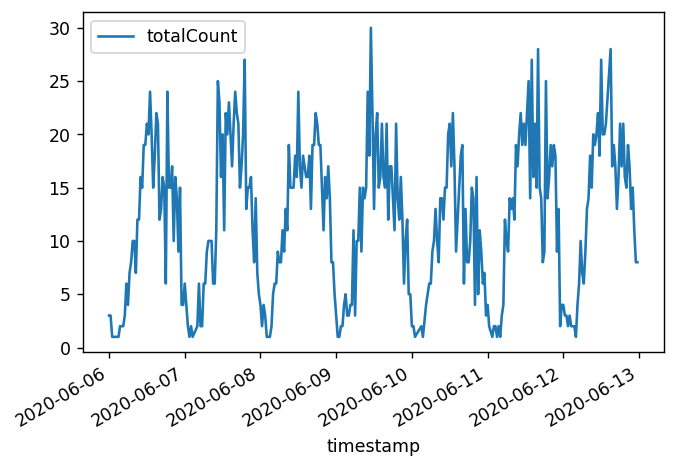

In [25]:
df.plot(x='timestamp',y='totalCount')

### Hmm, the data seem to have a seasonal aspect. During day the day, more 'objects' were counted. The opposite, is happening during the night.

This effect is called seasonality, and can be seen in many datasets that observe a variable over time through multiple periods.

Like airplane tickets or hotel bookings. During holiday periods you would expect higher sales, and during offseasons less sales. But what's the trent? How fast the buisness is growing? (or shringing?) That's harder to see.

In the recent years, timeseries analysis libraries have been developed for Python. One of the many functions provided by these libraries
is their ability to decompose (=decomposing break down into its elements. In the case of a timeserie,
the core elements are: trent, seasonality, and noise.) These elements, can be used then for further data insights.

> ! please before you try youself, be at least familiar with statists lingo and with core Python, Pandas, Numpy Packages.

Using these libraries, and a well defined, dataset, it's very easy to perform these functions, which can give us some insights regarding
the nature of the element that we are observing.

Be careful though, although it is seems easy, to do a TS analysis, it has many moving elements, which makes it hard to interpeter.
The `statsmodels` library, is a Python library, that has a primary focus to provide, statistical models for data analysis.
Among its other submodules that provides, it has a clean timeSeries analysis API, suitable for our needs.

> https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

```bash
# install statsmodel
$ pip install statsmodel
```

<ipython-input-44-27f865866b52>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timestamp'] = pd.DatetimeIndex(df2.timestamp)


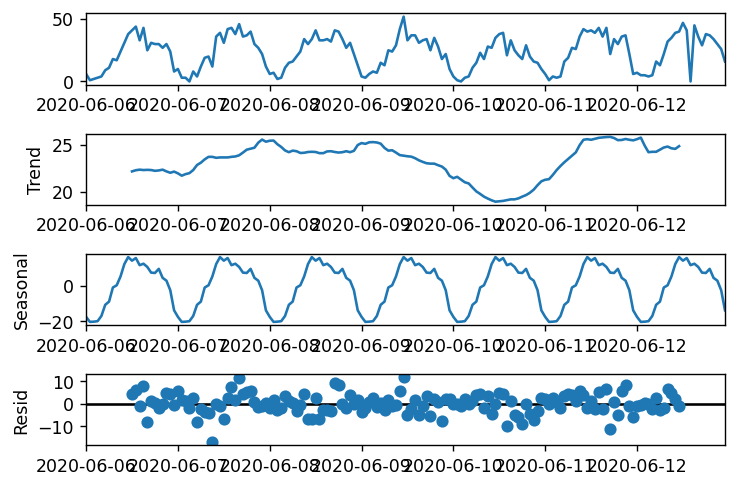

In [44]:
import statsmodels.api as sm

# Dataframe `df` comes from previous cells

df2 = df[['timestamp','totalCount']]
df2['timestamp'] = pd.DatetimeIndex(df2.timestamp)
df2.set_index('timestamp',drop=True,inplace=True)

#  resample by, hour
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html
df3 = df2.resample('H').sum()

# decompose the timeseries to its elements using a naive model:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
decomposition = sm.tsa.seasonal_decompose(df3, model='additive')

# and plot.
fig = decomposition.plot()

Timeseries of the observed values are f(t) = Trend(t) + Seasonality(t) + Error(t)
The rule of thumb to see if a model is performing adequate, is to examine the errors' chart: They should be as close to zero as possible.


In [42]:
df2.head()
#len(df2)

326

In [43]:
df3.head()
#len(df3)

168

## Let's make an App

Let's make something more useful now:

    A small app, that shows for each location, how busy was the location for a range of days.
    Our app, will contain widgets (visual tools) to enable some level of interactivity, between the user and the system.

    The widgets are marely, tools to help you define parametres in a visual way. All the logic is happening
    with the same tools that we discussed before.

In [28]:
from datetime import datetime
from datetime import timedelta

# https://ipywidgets.readthedocs.io/en/stable/index.html
from ipywidgets import interactive 
import ipywidgets as widgets
import pandas as pd

from IPython.display import display
import statsmodels.api as sm
import requests


In [45]:
LOCATIONS = sorted({"Argyle_St_@_Brown_St",
            "Argyle_St_@_Jamaica_St",
            "Argyle_St_@_Oswald_St",
            "Argyle_St_@_Oswald_St(static)",
            "Bellahouston_Park",
            "Bellahouston_Park_pathway_near_PRW_gate",
            "Broomielaw_@_James_Watt_St_(cam1)",
            "Broomielaw_@_James_Watt_St_(cam2)",
            "Broomielaw_Rear_of_Casino",
            "Broomielaw_@_Washington_St",
            "Byres_Rd_@_Dowanside_St",
            "Clyde_Walkway_@_Dixon_St",
            "Clyde_Walkway_@_Jamaica_St",
            "Clyde_walkway_@_McAlpine",
            "Clyde_Walkway_@_Stockwell_St",
            "Duke_St_@_Bellgrove",
            "Finnieston_Bridge_@_Lancefield_Quay",
            "Gallowgate_@_High_St(cam1)",
            "Gallowgate_@_High_St(cam2)",
            "George_Sq_@_South_Hanover_St",
            "Glasgow_Green_Circles",
            "Glasgow_Green_Doulton_Fountain",
            "Glasgow_Green_monument",
            "Glasgow_Green_Path",
            "Glasgow_Green_suspension_walkway",
            "Gordon_St_@_Renfield_St",
            "High_St_@_George_St",
            "Hope_St_@_Gordon_Street",
            "Hope_St_@_Waterloo_St",
            "Kelvingrove_Park_entrance",
            "Kelvingrove_Park_fountain",
            "Kelvingrove_Park_Kelvin_Way",
            "Kelvingrove_Park_overview",
            "Killermont_St_@_Royal_Concert_Hall",
            "Maryhill_Forth_Clyde_Canal",
            "Maryhill_Rd_@_Shakespeare_St",
            "Sauchiehall_St_@_Pitt_St",
            "Tollcross_Park(cam1)",
            "Tollcross_Park(cam2)",
            "Victoria_Rd_@_Allison_St"
             })

def f(location=...,start_date=...,days=...):
    def get_dataframe_for_location(location,start_date,days):
        if days > 7:
            raise ValueError('Days must be less than 7')

        params = dict()
        date_format = '%m/%d/%Y'
        _start_date = datetime.strptime(start_date,date_format)
        params['locations'] = location
        params['start_date'] = _start_date.strftime(date_format)
        params['end_date'] = (_start_date + timedelta(days=days)).strftime(date_format)
        # print(params)

        dataFrame = None
        next_page = endpoint
        page_number = 0
        while next_page:
            page_number += 1
            response = requests.get(
                url=next_page,
                auth=(username, password),
                params=params
            )
            assert 200 <= response.status_code <= 299
            data = response.json()
            number_of_results = data['count']
            next_page = data['next']
            if number_of_results > 0:
                tmp_df = pd.DataFrame.from_records(data=data['results'],index='id')
                tmp_df['timestamp'] = pd.to_datetime(tmp_df.timestamp)
                tmp_df['totalCount'] = tmp_df.apply(lambda row: row.cars + row.buses + row.persons + row.trucks + row.bicycles + row.motorcycles,1)

                if dataFrame is None:
                    dataFrame = tmp_df
                else:
                    dataFrame = pd.concat([dataFrame,tmp_df])

        return dataFrame


    df = get_dataframe_for_location(location=location,start_date=start_date,days=days)

    #
    df['timestamp'] = pd.DatetimeIndex(df.timestamp)
    df.set_index('timestamp',inplace=True)



    #  resampple by hour
    df2 = df[['totalCount']]
    df2 = df2.resample('H').sum()

    # https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
    # decompose the timeseries to its elements using a naive model:
    decomposition = sm.tsa.seasonal_decompose(df2, model='additive')

    # and plot them to see the elements
    fig = decomposition.plot()


In [46]:
type(LOCATIONS)

list

In [31]:
LOCATIONS_WIDGET= widgets.Dropdown(
    description= "Target Camera",
    options=LOCATIONS)
DATE_WIDGET = widgets.DatePicker(
    description="Date of Interest",
    value=datetime(2020,6,6)
)

RANGE_WIDGET = widgets.IntSlider(
    value=5,min=1,max=14,
    description='days from Target Date'
)

def app(location=LOCATIONS_WIDGET,start_date=DATE_WIDGET,days=RANGE_WIDGET):
    start_date = start_date.strftime('%m/%d/%Y')
    f(location,start_date=start_date,days=days)


In [32]:
# MAKE IT SO
w = interactive(app ,{'manual': True, 'manual_name': 'MAKE IT SO'})
display(w)

interactive(children=(Dropdown(description='Target Camera', options=('Argyle_St_@_Brown_St', 'Argyle_St_@_Jama…